In [1]:
import pandas as pd
from pyopenms import MzMLFile, MSExperiment, OnDiscMSExperiment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_df_with_original_id_mapped(df, exp, mapping_df):
    df = df.copy()
    ms2_spectra = np.array([spectrum for spectrum in exp.getSpectra() if spectrum.getMSLevel() == 2])
    breakpoint()
    ms2_spectra_in_df = ms2_spectra[df["MS2.Scan"].to_numpy()]
    df.insert(len(df.columns), "remapped_ids", [s.getNativeID() for s in ms2_spectra_in_df])
    df.insert(len(df.columns), "original_ids", [mapping_df.loc[remapped_id]["original_id"] for remapped_id in df["remapped_ids"]])
    return df

In [3]:
exp_all = MSExperiment()
MzMLFile().load("../../data/230928_JL_Immonium_ions_Modified_DIA_lower_energy.mzML", exp_all)

In [4]:
exp_subset = MSExperiment()
MzMLFile().load("../../data/workflow_test_tolerance_snr3_10ppm/lower_energy_windows_Y(UniMod:21).mzML", exp_subset)

In [5]:
mapping_df_all = pd.read_csv("../../data/230928_JL_Immonium_ions_Modified_DIA_id_mapping.csv", index_col="renamed_id")
mapping_df_subset = pd.read_csv("../../data/workflow_test_tolerance_snr3_10ppm/spectrum_id_mapping_Y(UniMod:21).csv", index_col="renamed_id")

In [6]:
df_phospho_all = get_df_with_original_id_mapped(pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho_all_spectra.tsv", delimiter="\t"), exp_all, mapping_df_all)

df_phospho_subset = get_df_with_original_id_mapped(pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho.tsv", delimiter="\t"), exp_subset, mapping_df_subset)
df_phospho_subset_with_decoys = pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho_with_decoys.tsv", delimiter="\t")

In [7]:
df_phospho_subset_with_decoys.iloc[5000]

File.Name                   /hpi/fs00/home/andrea.nathansen/workflow_test_...
Run                                                                    P02647
Protein.Group                                                   P02647;X00005
Protein.Ids                                                       APOA1_HUMAN
Protein.Names                                                           APOA1
Genes                                                                     NaN
PG.Quantity                                                               NaN
PG.Normalised                                                             NaN
PG.MaxLFQ                                                                 NaN
Genes.Quantity                                                            NaN
Genes.Normalised                                                          NaN
Genes.MaxLFQ                                                     VSFLSALEEYTK
Genes.MaxLFQ.Unique                                             

In [8]:
# to account for mismatching columns in result tsv for decoys
df_phospho_subset_decoys = df_phospho_subset_with_decoys[df_phospho_subset_with_decoys["Q.Value"].isna()]
df_phospho_subset_decoys.loc[:, "Q.Value"] = pd.to_numeric(df_phospho_subset_decoys["Precursor.Id"])
df_phospho_subset_decoys.loc[:, "Precursor.Id"] = df_phospho_subset_decoys["Modified.Sequence"]
df_phospho_subset_targets = df_phospho_subset_with_decoys[~df_phospho_subset_with_decoys["Q.Value"].isna()]
df_phospho_subset_decoys

,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan,IM,iIM,Predicted.IM,Predicted.iIM
3215,/hpi/fs00/home/andrea.nathansen/workflow_test_...,P31948;P31948-2;P31948-3,P31948;P31948-2;P31948-3,STIP1_HUMAN,STIP1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,/hpi/fs00/home/andrea.nathansen/workflow_test_...,P31948;P31948-2,P31948;P31948-2,STIP1_HUMAN,STIP1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,/hpi/fs00/home/andrea.nathansen/workflow_test_...,Q93074;Q93074-2;Q93074-3,Q93074;Q93074-2;Q93074-3,MED12_HUMAN,MED12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,/hpi/fs00/home/andrea.nathansen/workflow_test_...,P27694;X00001,P27694;X00001,PTM_Trainingskit_Kmod;RFA1_HUMAN,RPA1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,/hpi/fs00/home/andrea.nathansen/workflow_test_...,P04114,P04114,APOB_HUMAN,APOB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,/hpi/fs00/home/andrea.nathansen/workflow_test_...,Q9H9B1;Q9H9B1-3,Q9H9B1;Q9H9B1-3,EHMT1_HUMAN,EHMT1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5103,/hpi/fs00/home/andrea.nathansen/workflow_test_...,P11586,P11586,C1TC_HUMAN,MTHFD1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5104,/hpi/fs00/home/andrea.nathansen/workflow_test_...,Q9P2N5,Q9P2N5,RBM27_HUMAN,RBM27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5105,/hpi/fs00/home/andrea.nathansen/workflow_test_...,Q9P2N5,Q9P2N5,RBM27_HUMAN,RBM27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_phospho_subset_decoys["Precursor.Id"].str.contains("DECOY").sum()

1892

(array([828., 140.,  43.,  61.,  36.,  80.,  72.,  80.,  23.,  39.,  29.,
         61.,  48.,  29.,  59.,  54.,  24.,  36.,  56.,  43.,  55.,  36.,
         52.,  47.,  38.,  35.,  13.,  38.,  34.,  51.,  31.,  23.,  28.,
         15.,  27.,  44.,  26.,  41.,  42.,  21.,  56.,  38.,  45.,  20.,
         39.,  73.,  39.,  73.,  17.,  43.,  22.,  24.,  21.,  30.,  25.,
         41.,  36.,  14.,  21.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48

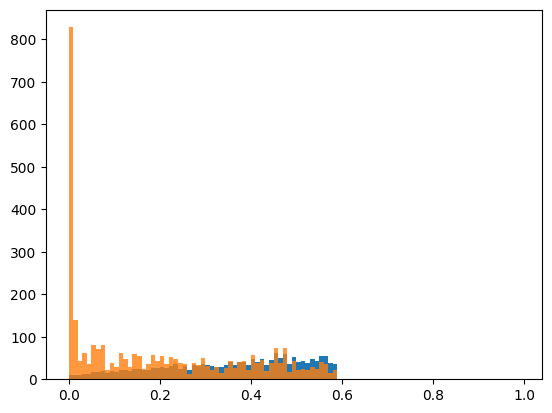

In [37]:
plt.hist(df_phospho_subset_decoys["Q.Value"], bins=np.arange(0, 1, 0.01))
plt.hist(df_phospho_subset_targets["Q.Value"], bins=np.arange(0, 1, 0.01), alpha=0.8)

In [9]:
pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho_with_decoys.tsv", delimiter="\t").columns

Index(['File.Name', 'Run', 'Protein.Group', 'Protein.Ids', 'Protein.Names',
       'Genes', 'PG.Quantity', 'PG.Normalised', 'PG.MaxLFQ', 'Genes.Quantity',
       'Genes.Normalised', 'Genes.MaxLFQ', 'Genes.MaxLFQ.Unique',
       'Modified.Sequence', 'Stripped.Sequence', 'Precursor.Id',
       'Precursor.Charge', 'Q.Value', 'PEP', 'Global.Q.Value',
       'Protein.Q.Value', 'PG.Q.Value', 'Global.PG.Q.Value', 'GG.Q.Value',
       'Translated.Q.Value', 'Proteotypic', 'Precursor.Quantity',
       'Precursor.Normalised', 'Precursor.Translated', 'Translated.Quality',
       'Ms1.Translated', 'Quantity.Quality', 'RT', 'RT.Start', 'RT.Stop',
       'iRT', 'Predicted.RT', 'Predicted.iRT', 'Lib.Q.Value', 'Lib.PG.Q.Value',
       'Ms1.Profile.Corr', 'Ms1.Area', 'Evidence', 'Spectrum.Similarity',
       'Averagine', 'Mass.Evidence', 'CScore', 'Decoy.Evidence',
       'Decoy.CScore', 'Fragment.Quant.Raw', 'Fragment.Quant.Corrected',
       'Fragment.Correlations', 'MS2.Scan', 'IM', 'iIM', 'Predicted

In [7]:
df_phospho_all["Protein.Ids"].unique()

array(['P27694;X00001', 'O14976;O14976-2;X00005',
       'Q9NPA8;Q9NPA8-2;X00001', 'P07954;P07954-2', 'X00001',
       'P37837;P37837-2;X00001', 'P29474;P29474-2;P29474-3;X00005',
       'P18206;P18206-2',
       'P06733;P09104;P13929;P09104-2;P13929-2;P13929-3;X00005', 'Q09666',
       'Q9NUV9', 'P53041;X00005', 'X00005', 'Q9H0A0;Q9H0A0-2;X00001',
       'Q13813;Q13813-2;Q13813-3;X00001', 'Q13237;Q13237-2',
       'P09104;P09104-2', 'P02647', 'Q13813;Q13813-2;Q13813-3',
       'Q99614;X00005', 'P18206;P18206-2;X00001',
       'Q13428;Q13428-5;Q13428-2;Q13428-3;Q13428-4;Q13428-6;Q13428-7;Q13428-8;X00001',
       'P27816;P27816-2;P27816-6;X00001', 'P20700;X00005',
       'P25440;P25440-2;P25440-3;P25440-4;X00001',
       'Q16630;Q16630-2;Q16630-3', 'P30049;X00001',
       'Q13428;Q13428-5;Q13428-2;Q13428-3;Q13428-4;Q13428-6;Q13428-7;Q13428-8',
       'P27824;P27824-2;X00005', 'Q9Y2W2;X00005', 'P49005;X00001',
       'P12111;P12111-2', 'Q8WW12;Q8WW12-2;X00001',
       'Q86V48;Q86V48-2;Q8

In [8]:
df_phospho_all[df_phospho_all["Protein.Q.Value"] <= 0.01]["Protein.Ids"].str.contains("X0000").sum()

924

In [9]:
len(df_phospho_all[df_phospho_all["Protein.Q.Value"] <= 0.01])

1109

In [47]:
df_phospho_all["Protein.Ids"].str.contains("X0000").sum()

1178

In [10]:
df_phospho_subset["original_ids"]

0       controllerType=0 controllerNumber=1 scan=59286
1       controllerType=0 controllerNumber=1 scan=58487
2       controllerType=0 controllerNumber=1 scan=37681
3       controllerType=0 controllerNumber=1 scan=37032
4       controllerType=0 controllerNumber=1 scan=20370
                             ...                      
3210    controllerType=0 controllerNumber=1 scan=34314
3211    controllerType=0 controllerNumber=1 scan=65050
3212    controllerType=0 controllerNumber=1 scan=55565
3213    controllerType=0 controllerNumber=1 scan=54973
3214    controllerType=0 controllerNumber=1 scan=57094
Name: original_ids, Length: 3215, dtype: object

In [11]:
len(df_phospho_all["Precursor.Id"].unique())

1368

In [12]:
len(df_phospho_subset["MS2.Scan"])

3215

In [13]:
df_phospho_all[df_phospho_all["Protein.Q.Value"] <= 0.01]["Modified.Sequence"].str.contains("UniMod:21").sum()

224

In [14]:
df_phospho_all["Modified.Sequence"].str.contains("UniMod:21").sum()

373

In [16]:
df_phospho_subset[df_phospho_subset["Modified.Sequence"].str.contains("UniMod:21")]["Protein.Ids"].str.contains("X00005").sum()

225

In [17]:
df_phospho_subset["Modified.Sequence"].str.contains("UniMod:21").sum()

532

In [18]:
len(df_phospho_all[np.logical_and(df_phospho_all["Modified.Sequence"].str.contains("UniMod:21"), df_phospho_all["Protein.Ids"].str.contains("X00005"))])

286

In [34]:
len(df_phospho_subset[np.logical_and(np.logical_and(df_phospho_subset["Q.Value"] < 0.9, df_phospho_subset["Modified.Sequence"].str.contains("UniMod:21")), df_phospho_subset["Protein.Ids"].str.contains("X00002"))])

13

In [29]:
len(df_phospho_subset[np.logical_and(df_phospho_subset["Q.Value"] < 0.114888, df_phospho_subset["Modified.Sequence"].str.contains("UniMod:21"))])

378

In [28]:
(df_phospho_subset["Q.Value"] < 0.114888).sum()

1463

In [39]:
subset_matching_windows = df_phospho_subset.merge(df_phospho_all, on="original_ids", suffixes=("_subset", "_all"))
subset_matching_windows_precursors = subset_matching_windows[subset_matching_windows["Precursor.Id_subset"] == subset_matching_windows["Precursor.Id_all"]]

In [41]:
subset_matching_windows_not_precursors = subset_matching_windows[subset_matching_windows["Precursor.Id_subset"] != subset_matching_windows["Precursor.Id_all"]]

In [48]:
len(subset_matching_windows_not_precursors[np.logical_and(subset_matching_windows_not_precursors["Modified.Sequence_subset"].str.contains("UniMod:21"), subset_matching_windows_not_precursors["Modified.Sequence_all"].str.contains("UniMod:21"))])

23

In [50]:
subset_matching_precursors = df_phospho_subset.merge(df_phospho_all, on="Precursor.Id", suffixes=("_subset", "_all"))

In [54]:
subset_matching_precursors.columns

Index(['File.Name_subset', 'Run_subset', 'Protein.Group_subset',
       'Protein.Ids_subset', 'Protein.Names_subset', 'Genes_subset',
       'PG.Quantity_subset', 'PG.Normalised_subset', 'PG.MaxLFQ_subset',
       'Genes.Quantity_subset',
       ...
       'Fragment.Quant.Raw_all', 'Fragment.Quant.Corrected_all',
       'Fragment.Correlations_all', 'MS2.Scan_all', 'IM_all', 'iIM_all',
       'Predicted.IM_all', 'Predicted.iIM_all', 'remapped_ids_all',
       'original_ids_all'],
      dtype='object', length=117)

In [58]:
subset_matching_precursors_not_windows = subset_matching_precursors[subset_matching_precursors["original_ids_subset"] != subset_matching_precursors["original_ids_all"]]

In [69]:
(~subset_matching_precursors_not_windows["original_ids_all"].isin(mapping_df_subset["original_id"])).sum()

193

In [62]:
subset_matching_precursors_not_windows["Modified.Sequence_all"].str.contains("UniMod:21").sum()

36

In [69]:
# subset_matching_windows = df_phospho_subset[np.logical_and(df_phospho_subset["original_ids"].isin(df_phospho_all["original_ids"]), df_phospho_subset["Precursor.Id"].isin(df_phospho_all["Precursor.Id"]))]
# subset_matching_windows_precursors = subset_matching_windows[subset_matching_windows["Precursor.Id"].isin(df_phospho_all["Precursor.Id"])]

In [26]:
len(subset_matching_windows_precursors), subset_matching_windows_precursors["Q.Value_subset"].max()

(571, 0.114888)

(array([551.,  13.,   5.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69]),
 <BarContainer object of 69 artists>)

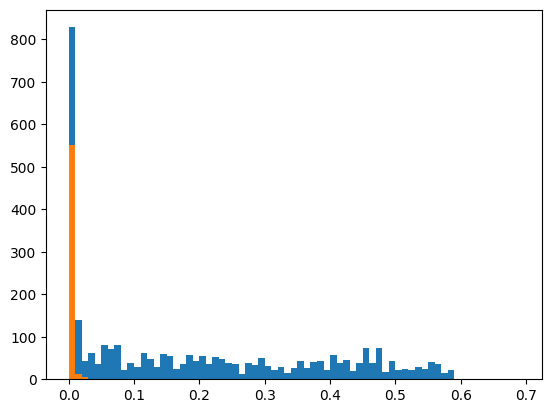

In [31]:
plt.hist(df_phospho_subset["Q.Value"], bins=np.arange(0, 0.7, 0.01))
plt.hist(subset_matching_windows_precursors["Q.Value_subset"], bins=np.arange(0, 0.7, 0.01))
#plt.bar(subset_matching_windows_precursors["Q.Value_subset"], np.repeat(300, len(subset_matching_windows_precursors)), width=0.002, color="orange")

<BarContainer object of 584 artists>

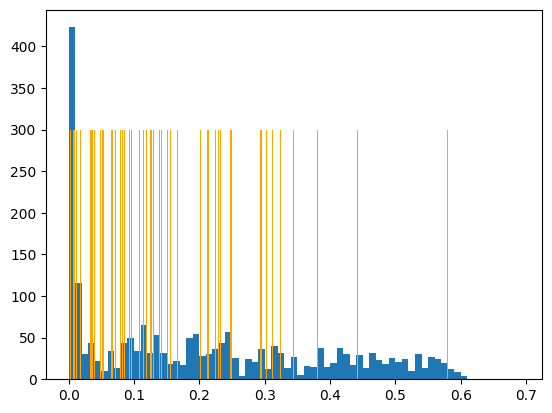

In [68]:
# subset_likely_true_precursors = df_phospho_subset[df_phospho_subset["Precursor.Id"].isin(df_phospho_all["Precursor.Id"])]
# plt.hist(df_phospho_subset["Q.Value"], bins=np.arange(0, 0.7, 0.01))
# plt.bar(subset_likely_true_precursors["Q.Value"], np.repeat(300, len(subset_likely_true_precursors)), width=0.001, color="orange")